In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [40]:
# change default matplotlib plot colors
CB91_Blue = '#2CBDFE'
CB91_Green = '#1B8667'
CB91_Yellow = '#CBD46F'
CB91_Orange = '#FCCA60'
CB91_Magenta = '#C84564'

color_list = [CB91_Blue, CB91_Green, CB91_Yellow, CB91_Orange,
              CB91_Magenta]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

# I - Import Data and Data Exploration

In [3]:
df = pd.read_csv('database.csv')
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


# II - Preprocessing and Dealing with Timestamp

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

In [5]:
# replace null values with 0
df = df.fillna(0)

In [6]:
# convert time to standard time object
def time_clean(time):
    time = re.split('[/:\s]', time) # split with delimeters (comma,semicolon,space)
    for i in [0,1,3,4]:
        if len(time[i]) < 2:
            time[i] = '0' + time[i]
    time = (' ').join(time)
    
    datetime_object = datetime.strptime(time, '%m %d %Y %I %M %p')
    return datetime_object

In [7]:
# extracting datetime values to make groupby easier
df['datetime'] = df['Accident Date/Time'].apply(time_clean)
df['month'] = [i.month for i in df['datetime']]
df['hour'] = [i.hour for i in df['datetime']]

# III - Analysis

## (1) How are incidents distributed by year, month, and hour of the day?

In [8]:
numacc_year = df.groupby('Accident Year').agg('count')[['Report Number']]
numacc_month = df.groupby('month').agg('count')[['Report Number']]
numacc_hour = df.groupby('hour').agg('count')[['Report Number']]

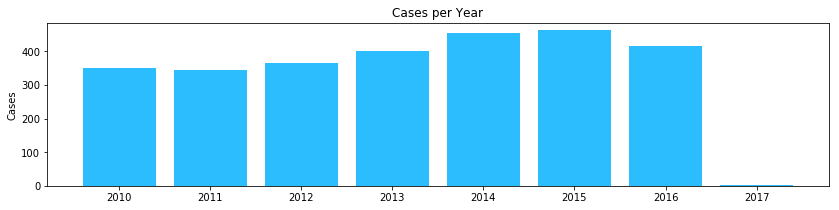

In [41]:
plt.figure(figsize=(14,3))
plt.bar(numacc_year.index, numacc_year['Report Number'])
plt.title('Cases per Year')
plt.ylabel('Cases')
plt.show()

In [10]:
numacc_year.head(6)

,Report Number
Accident Year,
2010,350
2011,345
2012,366
2013,401
2014,454
2015,462


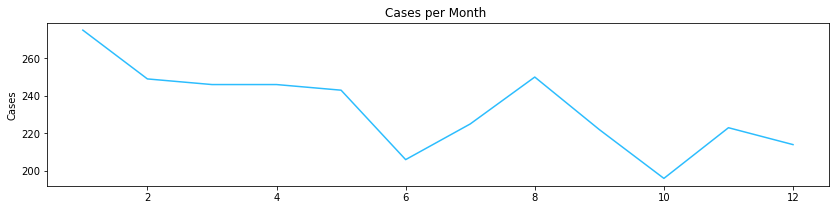

In [42]:
plt.figure(figsize=(14,3))
plt.plot(numacc_month.index, numacc_month['Report Number'])
plt.title('Cases per Month ')
plt.ylabel('Cases')
plt.show()

In [12]:
numacc_month.head(12)

,Report Number
month,
1,275
2,249
3,246
4,246
5,243
6,206
7,225
8,250
9,222


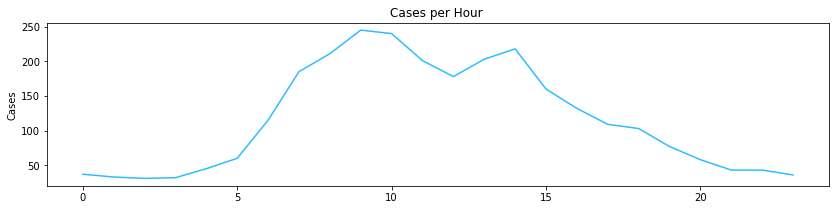

In [43]:
plt.figure(figsize=(14,3))
plt.plot(numacc_hour.index, numacc_hour['Report Number'])
plt.title('Cases per Hour ')
plt.ylabel('Cases')
plt.show()

## (2) Where are these incidents located?

In [14]:
import plotly.express as px

In [15]:
df_scatter = df[['Accident Date/Time','Accident City','Pipeline/Facility Name',
               'Pipeline Type','Accident Latitude', 'Accident Longitude',
               'Accident State' ]]
df_scatter.head()

,Accident Date/Time,Accident City,Pipeline/Facility Name,Pipeline Type,Accident Latitude,Accident Longitude,Accident State
0,1/1/2010 7:15 AM,MCPHERSON,KINDER MORGAN JCT,ABOVEGROUND,38.67070,-97.78123,KS
1,1/4/2010 8:30 AM,RAYMOND,24-INCH MAIN LINE,ABOVEGROUND,43.94028,-70.49336,ME
2,1/5/2010 10:30 AM,SULPHER,0,ABOVEGROUND,30.18240,-93.35240,LA
3,1/6/2010 7:30 PM,SUPERIOR,SUPERIOR TERMINAL,UNDERGROUND,46.68930,-92.06120,WI
4,1/7/2010 1:00 PM,SHERMAN,RED RIVER EAST,UNDERGROUND,33.58266,-96.64881,TX


In [16]:
fig = px.scatter_mapbox(df_scatter, lat="Accident Latitude", 
                        lon="Accident Longitude", 
                        hover_name="Pipeline/Facility Name",
                        hover_data=["Accident Date/Time",
                                    "Accident City",
                                    'Pipeline Type'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=3, height=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## (3) What is the net loss of each state?

In [17]:
df_bystate = df
df_bystate = df_scatter.groupby('Accident State').agg('count')['Pipeline Type']
df_bystate = df_bystate.reset_index()
df_bystate = df_bystate.rename(columns={"Pipeline Type": "Number of Accidents"})

In [18]:
columns = ['Net Loss (Barrels)','All Costs']
df_bystate = df.groupby('Accident State').agg(['sum','count'])
df_bystate = df_bystate[columns]
df_bystate['Number of Accident'] = df_bystate['Net Loss (Barrels)']['count']
df_bystate['Num Barrels Lost'] = df_bystate['Net Loss (Barrels)']['sum'].apply(lambda x: round(x,2))
df_bystate['Loss (million USD)'] = (df_bystate['All Costs']['sum']/(1000000)).apply(lambda x: round(x,2))
df_bystate = df_bystate.drop(columns=columns,axis=1)
df_bystate = df_bystate.reset_index()

In [19]:
df_bystate.head()

,Accident State,Number of Accident,Num Barrels Lost,Loss (million USD)
,,,,
0,0,12,8.92,9.60
1,AK,11,1119.00,48.85
2,AL,21,10313.63,72.24
3,AR,13,1395.33,96.66
4,CA,153,3389.57,192.08


In [20]:
k = df_bystate.sort_values(by='Loss (million USD)',ascending=False)
k.head()

,Accident State,Number of Accident,Num Barrels Lost,Loss (million USD)
,,,,
20,MI,29,5355.17,883.60
4,CA,153,3389.57,192.08
40,TX,1004,135579.99,184.75
24,MT,30,2633.33,145.67
12,IL,108,26316.92,120.73


In [23]:
for col in df_bystate.columns:
    df_bystate[col] = df_bystate[col].astype(str)
df_bystate['text'] = df_bystate['Accident State'] + '<br>' + 'Number of Accident: ' + df_bystate['Number of Accident']+ '<br>' + 'Num Barrels Lost: ' + df_bystate['Num Barrels Lost']

In [24]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Choropleth(
    locations=df_bystate['Accident State'], # Spatial coordinates
    z = df_bystate['Loss (million USD)'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    text=df_bystate['text'],
    colorbar_title = "Net Loss (million of USD)"
    
))

fig.update_layout(
    title_text = 'Overall Loss (million of USD) by State from 2010-2017',
    geo_scope='usa' # limite map scope to USA
)

fig.show()

## (4) What happened in Michigan?

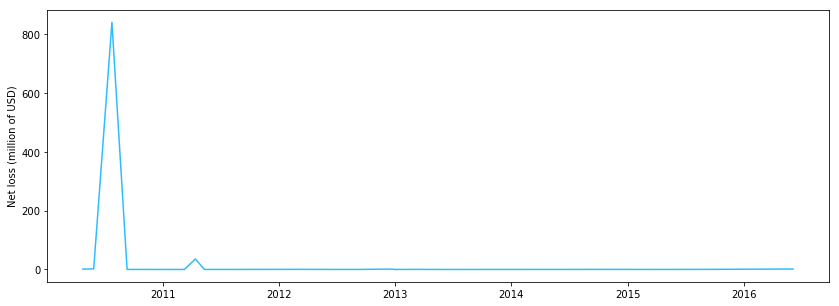

In [44]:
df_temp = df[df['Accident State']=='MI']
df_temp = df_temp.sort_values('datetime')
plt.figure(figsize=(14,5))
plt.plot(df_temp['datetime'], df_temp['All Costs']/1000000)
plt.ylabel('Net loss (million of USD)')
plt.show()

In [26]:
df_temp.shape

(29, 51)

In [27]:
df_temp['All Costs'].sum()

883604433

In [46]:
df_temp = df_temp.sort_values('All Costs', ascending=False)
df_temp[['Accident City','datetime','Cause Category',
         'Unintentional Release (Barrels)','Intentional Release (Barrels)',
         'Liquid Recovery (Barrels)','Net Loss (Barrels)',
         'All Costs' ]].reset_index().head(10)

,index,Accident City,datetime,Cause Category,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),All Costs
0,194,MARSHALL,2010-07-25 17:58:00,MATERIAL/WELD/EQUIP FAILURE,20082.00,0.0,18245.0,1837.00,840526118
1,457,DANSVILLE,2011-04-13 18:58:00,MATERIAL/WELD/EQUIP FAILURE,9000.00,0.0,6643.0,2357.00,35728903
2,140,CONSTANTINE,2010-05-29 12:34:00,MATERIAL/WELD/EQUIP FAILURE,2121.00,0.0,1001.0,1120.00,1965246
3,2562,BANGOR,2016-06-03 12:00:00,OTHER OUTSIDE FORCE DAMAGE,280.00,0.0,280.0,0.00,1418000
4,1049,WAYNE,2012-12-21 11:00:00,INCORRECT OPERATION,3.00,0.0,3.0,0.00,1216083
5,103,SAMARIA,2010-04-25 09:00:00,MATERIAL/WELD/EQUIP FAILURE,91.00,0.0,79.0,12.00,1103967
6,1179,TEMPERANCE,2013-04-01 17:25:00,MATERIAL/WELD/EQUIP FAILURE,2.39,0.0,1.0,1.39,325409
7,739,STERLING,2012-02-15 14:15:00,MATERIAL/WELD/EQUIP FAILURE,20.00,0.0,20.0,0.00,300000
8,2249,TEMPERANCE,2015-09-13 18:23:00,MATERIAL/WELD/EQUIP FAILURE,22.00,0.0,22.0,0.00,274700
9,1889,MANISTIQUE,2014-12-08 09:30:00,MATERIAL/WELD/EQUIP FAILURE,0.00,0.0,0.0,0.00,214500


In [29]:
# analyze the major leakage
a = df_temp.iloc[0]['All Costs']/df_temp['All Costs'].sum()
b = df_temp.iloc[0]['All Costs']/df['All Costs'].sum()
print(a,b)

0.9512470587616438 0.3605670510580793


## (5) What is the main culprit of oil leakages?

In [52]:
df_temp = df.groupby('Cause Category').agg(['count','sum'])[['All Costs','All Fatalities']]
df_temp['Number of Cases'] = df_temp['All Costs']['count']
df_temp['Loss (million USD)'] = (df_temp['All Costs']['sum']/(1000000)).apply(lambda x: round(x,2))
df_temp['Fatalities'] = df_temp['All Fatalities']['sum']
df_temp = df_temp.drop(['All Costs','All Fatalities'],axis=1).reset_index()
df_temp

,Cause Category,Number of Cases,Loss (million USD),Fatalities
,,,,
0,ALL OTHER CAUSES,118,110.82,4.0
1,CORROSION,592,395.33,0.0
2,EXCAVATION DAMAGE,97,93.10,1.0
3,INCORRECT OPERATION,378,106.14,0.0
4,MATERIAL/WELD/EQUIP FAILURE,1435,1243.77,1.0
5,NATURAL FORCE DAMAGE,118,220.35,0.0
6,OTHER OUTSIDE FORCE DAMAGE,57,161.60,4.0


In [50]:
# analyze their percentages
df_temp_2 = df_temp.copy()
df_temp_2['Number of Cases'] = df_temp['Number of Cases']/df_temp['Number of Cases'].sum()
df_temp_2['Loss (million USD)'] = df_temp['Loss (million USD)']/df_temp['Loss (million USD)'].sum()
df_temp_2['Fatalities'] = df_temp['Fatalities']/df_temp['Fatalities'].sum()
df_temp_2

,Cause Category,Number of Cases,Loss (million USD),Fatalities
,,,,
0,ALL OTHER CAUSES,0.042218,0.047540,0.4
1,CORROSION,0.211807,0.169589,0.0
2,EXCAVATION DAMAGE,0.034705,0.039938,0.1
3,INCORRECT OPERATION,0.135242,0.045532,0.0
4,MATERIAL/WELD/EQUIP FAILURE,0.513417,0.533553,0.1
5,NATURAL FORCE DAMAGE,0.042218,0.094526,0.0
6,OTHER OUTSIDE FORCE DAMAGE,0.020394,0.069323,0.4
